# Notebook to gather and visualize data about Toronto Metropolitan University faculty member research expertise

Requirements:
    
    !pip install pandas
    !pip install bs4
    !pip install openai
    !pip install requests
    !pip install wordcloud

Also requires [OpenAI account](https://openai.com/) and [OpenAI API key](https://platform.openai.com/account/api-keys). The key must be placed in a text file and pointed 
to in the setup cell (open_ai_inpath) below. Alternatively, store API key in os environment variable and use the commented out snippet in setup below.

License: [CC BY-NC 3.0](https://creativecommons.org/licenses/by-nc/3.0/)


### Setup

In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import openai
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# set paths
json_outpath = 'data/tmu_faculty_bios.json'
open_ai_inpath = 'd:/ai-projects/secrets/SECRETS-OPENAI.txt'

# set OpenAI api key using secrets text file
with open(open_ai_inpath, 'r') as in_file:
    openai.api_key = in_file.readlines()[0]

# # set OpenAI api key using environment variable
# import os
# openai.api_key = os.environ['OPENAI_API_KEY']

### Scrape TMU website using requests and beautiful soup & load faculty bios into pandas dataframe

In [43]:
# Get data for all faculty

# Get api data for faculty

url = 'https://www.torontomu.ca/law/faculty-and-research/faculty/jcr:content/content/resbiographystack.data.1.json'
response = requests.get(url)
json_data = response.json()
df = pd.DataFrame(json_data['data'])

# Get api data for cross-appointed faculty
url = 'https://www.torontomu.ca/law/faculty-and-research/faculty/jcr:content/content/resbiographystack_1397589177.data.1.json'
response = requests.get(url)
json_data = response.json()
df2 = pd.DataFrame(json_data['data'])

# Combine faculty data
df = pd.concat([df, df2], ignore_index=True)

df['page']=df['page'].str.replace('/content/ryerson/','https://www.torontomu.ca/')

df

,page,firstname,lastname,title,email,department,specialization,thumbnailImage,thumbnailAltText,tags
0,https://www.torontomu.ca/law/faculty-and-resea...,Idil,Atak,Associate Professor,idil.atak@torontomu.ca,Lincoln Alexander School of Law,"Irregular migration, refugee protection, secur...",/content/dam/law/faculty/Idil_Atak_1200x900.jpg,Idil Atak,NaN
1,https://www.torontomu.ca/law/faculty-and-resea...,Ed,Béchard-Torres,Assistant Professor,NaN,Lincoln Alexander School of Law,Corporate law; contract law; constitutional la...,/content/dam/law/faculty/Ed-Bechard-Torres-120...,Ed Béchard-Torres,NaN
2,https://www.torontomu.ca/law/faculty-and-resea...,Hilary Evans,Cameron,Assistant Professor,h.evanscameron@torontomu.ca,Lincoln Alexander School of Law,Refugee law; administrative law; memory; risk ...,/content/dam/law/faculty/hilary-evans-cameron.jpg,Hilary Evans Cameron,NaN
3,https://www.torontomu.ca/law/faculty-and-resea...,Christopher,Campbell-Duruflé,Assistant Professor,NaN,Lincoln Alexander School of Law,"International law, environmental law, human ri...",/content/dam/law/faculty/Christopher_Campbell-...,Christopher Campbell-Duruflé,"[{'tagId': 'Positions-Titles:Professor', 'tagT..."
4,https://www.torontomu.ca/law/faculty-and-resea...,Scott,Franks,Assistant Professor,scott.franks@torontomu.ca,Lincoln Alexander School of Law,Aboriginal Law; Indigenous legal orders; criti...,/content/dam/law/faculty/Scott_Franks_1200x900...,Scott Franks,NaN
5,https://www.torontomu.ca/law/faculty-and-resea...,Sari,Graben,Associate Dean Research &amp; Graduate Studies...,sgraben@torontomu.ca,Lincoln Alexander School of Law,"Environmental law, Aboriginal Law, Gender, Res...",/content/dam/law/images/sari-graben-new.jpg,Sari Graben,NaN
6,https://www.torontomu.ca/law/faculty-and-resea...,Kathleen (Katie),Hammond,Assistant Professor,kathleen.hammond@torontomu.ca,Lincoln Alexander School of Law,Science and technology law; health law; family...,/content/dam/law/faculty/kathleen-hammond.jpg,Kathleen Hammond,NaN
7,https://www.torontomu.ca/law/faculty-and-resea...,Graham,Hudson,"Associate Dean, Academic; Professor",graham.hudson@torontomu.ca,Lincoln Alexander School of Law,"Socio-legal studies, access to justice, crimin...",/content/dam/law/faculty/Graham_Hudson_new.jpg,"Graham Hudson, Associate Professor",NaN
8,https://www.torontomu.ca/law/faculty-and-resea...,Angela,Lee,Assistant Professor,angela@torontomu.ca,Lincoln Alexander School of Law,Law and technology; food and agriculture law; ...,/content/dam/law/faculty/angela-lee.jpg,Angela Lee,NaN
9,https://www.torontomu.ca/law/faculty-and-resea...,Avner,Levin,Professor,avner.levin@torontomu.ca,Lincoln Alexander School of Law and the busine...,Legal regulation and protection of privacy and...,/content/dam/law/faculty/avner-levin.jpg,Avner Levin,NaN


In [44]:
# Get faculty bios from faculty pages

def get_bio(page):
    response = requests.get(page)
    soup = BeautifulSoup(response.text, 'html.parser')

    # get text from div "row bioTop bioDisplay1"
    text = soup.find('div', {'class': 'row bioTop bioDisplay1'}).text
    # get text from the first div that includes .resText
    text2 = soup.find('div', {'class': 'resText'}).text

    # Combine to get bio & clean
    bio = text + ' ' + text2
    # remove newlines
    bio = bio.replace('\n', ' ')
    # remove multiple spaces
    bio = ' '.join(bio.split())

    time.sleep(1)

    return bio

df['bio'] = df['page'].apply(get_bio)

df

,page,firstname,lastname,title,email,department,specialization,thumbnailImage,thumbnailAltText,tags,bio
0,https://www.torontomu.ca/law/faculty-and-resea...,Idil,Atak,Associate Professor,idil.atak@torontomu.ca,Lincoln Alexander School of Law,"Irregular migration, refugee protection, secur...",/content/dam/law/faculty/Idil_Atak_1200x900.jpg,Idil Atak,NaN,Idil Atak Associate Professor DepartmentLincol...
1,https://www.torontomu.ca/law/faculty-and-resea...,Ed,Béchard-Torres,Assistant Professor,NaN,Lincoln Alexander School of Law,Corporate law; contract law; constitutional la...,/content/dam/law/faculty/Ed-Bechard-Torres-120...,Ed Béchard-Torres,NaN,Ed Béchard-Torres Assistant Professor Departme...
2,https://www.torontomu.ca/law/faculty-and-resea...,Hilary Evans,Cameron,Assistant Professor,h.evanscameron@torontomu.ca,Lincoln Alexander School of Law,Refugee law; administrative law; memory; risk ...,/content/dam/law/faculty/hilary-evans-cameron.jpg,Hilary Evans Cameron,NaN,Hilary Evans Cameron Assistant Professor Depar...
3,https://www.torontomu.ca/law/faculty-and-resea...,Christopher,Campbell-Duruflé,Assistant Professor,NaN,Lincoln Alexander School of Law,"International law, environmental law, human ri...",/content/dam/law/faculty/Christopher_Campbell-...,Christopher Campbell-Duruflé,"[{'tagId': 'Positions-Titles:Professor', 'tagT...",Christopher Campbell-Duruflé Assistant Profess...
4,https://www.torontomu.ca/law/faculty-and-resea...,Scott,Franks,Assistant Professor,scott.franks@torontomu.ca,Lincoln Alexander School of Law,Aboriginal Law; Indigenous legal orders; criti...,/content/dam/law/faculty/Scott_Franks_1200x900...,Scott Franks,NaN,Scott Franks Assistant Professor DepartmentLin...
5,https://www.torontomu.ca/law/faculty-and-resea...,Sari,Graben,Associate Dean Research &amp; Graduate Studies...,sgraben@torontomu.ca,Lincoln Alexander School of Law,"Environmental law, Aboriginal Law, Gender, Res...",/content/dam/law/images/sari-graben-new.jpg,Sari Graben,NaN,Sari Graben Associate Dean Research & Graduate...
6,https://www.torontomu.ca/law/faculty-and-resea...,Kathleen (Katie),Hammond,Assistant Professor,kathleen.hammond@torontomu.ca,Lincoln Alexander School of Law,Science and technology law; health law; family...,/content/dam/law/faculty/kathleen-hammond.jpg,Kathleen Hammond,NaN,Kathleen (Katie) Hammond Assistant Professor D...
7,https://www.torontomu.ca/law/faculty-and-resea...,Graham,Hudson,"Associate Dean, Academic; Professor",graham.hudson@torontomu.ca,Lincoln Alexander School of Law,"Socio-legal studies, access to justice, crimin...",/content/dam/law/faculty/Graham_Hudson_new.jpg,"Graham Hudson, Associate Professor",NaN,"Graham Hudson Associate Dean, Academic; Profes..."
8,https://www.torontomu.ca/law/faculty-and-resea...,Angela,Lee,Assistant Professor,angela@torontomu.ca,Lincoln Alexander School of Law,Law and technology; food and agriculture law; ...,/content/dam/law/faculty/angela-lee.jpg,Angela Lee,NaN,Angela Lee Assistant Professor DepartmentLinco...
9,https://www.torontomu.ca/law/faculty-and-resea...,Avner,Levin,Professor,avner.levin@torontomu.ca,Lincoln Alexander School of Law and the busine...,Legal regulation and protection of privacy and...,/content/dam/law/faculty/avner-levin.jpg,Avner Levin,NaN,Avner Levin Professor DepartmentLincoln Alexan...


In [45]:
# Summarize faculty bios into research expertise keywords

# function to send prompt to GPT-3 and return completion
def get_completion(prompt, model_to_use):
    for attempt in range (5):
        try:
            model_output = openai.Completion.create(
            model=model_to_use,
            prompt=prompt,
            temperature= 0,
            max_tokens = 100,
            stop='\n')
            return model_output
        except:
            time.sleep(5)

# Send bio to GPT-3 and get keywords
model = 'text-davinci-003'
prompt_header = 'CONTEXT: The following text is a bio of a Faculty of Law faculty member. \n'\
'TASK: Based on the bio provide a list of up to 5 keywords that best describe the faculty member\'s '\
'main areas of research, separated by semi-colons. List the keywords in order of importance, with the most '\
'important keyword first. \n BIO: '
suffix_header = ' \nKEYWORDS:'

# iterate through the df and get the completions
for index, row in df.iterrows():
    bio = row['bio']
    bio = bio.replace('\n', ' ').strip()
    prompt = prompt_header + bio + suffix_header
    completion = get_completion(prompt, model).choices[0].text
    df.at[index, 'keywords'] = completion
    time.sleep(2.5) # slow down to avoid openai errors

# Save to json for future use
df.to_json(json_outpath, orient='records', indent = 2)

df

,page,firstname,lastname,title,email,department,specialization,thumbnailImage,thumbnailAltText,tags,bio,keywords
0,https://www.torontomu.ca/law/faculty-and-resea...,Idil,Atak,Associate Professor,idil.atak@torontomu.ca,Lincoln Alexander School of Law,"Irregular migration, refugee protection, secur...",/content/dam/law/faculty/Idil_Atak_1200x900.jpg,Idil Atak,NaN,Idil Atak Associate Professor DepartmentLincol...,Irregular migration; Refugee protection; Secu...
1,https://www.torontomu.ca/law/faculty-and-resea...,Ed,Béchard-Torres,Assistant Professor,NaN,Lincoln Alexander School of Law,Corporate law; contract law; constitutional la...,/content/dam/law/faculty/Ed-Bechard-Torres-120...,Ed Béchard-Torres,NaN,Ed Béchard-Torres Assistant Professor Departme...,Constitutional law; corporate law; contract l...
2,https://www.torontomu.ca/law/faculty-and-resea...,Hilary Evans,Cameron,Assistant Professor,h.evanscameron@torontomu.ca,Lincoln Alexander School of Law,Refugee law; administrative law; memory; risk ...,/content/dam/law/faculty/hilary-evans-cameron.jpg,Hilary Evans Cameron,NaN,Hilary Evans Cameron Assistant Professor Depar...,Refugee law; administrative law; risk percept...
3,https://www.torontomu.ca/law/faculty-and-resea...,Christopher,Campbell-Duruflé,Assistant Professor,NaN,Lincoln Alexander School of Law,"International law, environmental law, human ri...",/content/dam/law/faculty/Christopher_Campbell-...,Christopher Campbell-Duruflé,"[{'tagId': 'Positions-Titles:Professor', 'tagT...",Christopher Campbell-Duruflé Assistant Profess...,International law; Environmental law; Human r...
4,https://www.torontomu.ca/law/faculty-and-resea...,Scott,Franks,Assistant Professor,scott.franks@torontomu.ca,Lincoln Alexander School of Law,Aboriginal Law; Indigenous legal orders; criti...,/content/dam/law/faculty/Scott_Franks_1200x900...,Scott Franks,NaN,Scott Franks Assistant Professor DepartmentLin...,Indigenous legal orders; Aboriginal Law; Indi...
5,https://www.torontomu.ca/law/faculty-and-resea...,Sari,Graben,Associate Dean Research &amp; Graduate Studies...,sgraben@torontomu.ca,Lincoln Alexander School of Law,"Environmental law, Aboriginal Law, Gender, Res...",/content/dam/law/images/sari-graben-new.jpg,Sari Graben,NaN,Sari Graben Associate Dean Research & Graduate...,Indigenous peoples; Regulatory institutions; ...
6,https://www.torontomu.ca/law/faculty-and-resea...,Kathleen (Katie),Hammond,Assistant Professor,kathleen.hammond@torontomu.ca,Lincoln Alexander School of Law,Science and technology law; health law; family...,/content/dam/law/faculty/kathleen-hammond.jpg,Kathleen Hammond,NaN,Kathleen (Katie) Hammond Assistant Professor D...,Assisted Reproductive Technologies; Health La...
7,https://www.torontomu.ca/law/faculty-and-resea...,Graham,Hudson,"Associate Dean, Academic; Professor",graham.hudson@torontomu.ca,Lincoln Alexander School of Law,"Socio-legal studies, access to justice, crimin...",/content/dam/law/faculty/Graham_Hudson_new.jpg,"Graham Hudson, Associate Professor",NaN,"Graham Hudson Associate Dean, Academic; Profes...",Access to justice; Constitutional law; Legal ...
8,https://www.torontomu.ca/law/faculty-and-resea...,Angela,Lee,Assistant Professor,angela@torontomu.ca,Lincoln Alexander School of Law,Law and technology; food and agriculture law; ...,/content/dam/law/faculty/angela-lee.jpg,Angela Lee,NaN,Angela Lee Assistant Professor DepartmentLinco...,Law and technology; food and agriculture law;...
9,https://www.torontomu.ca/law/faculty-and-resea...,Avner,Levin,Professor,avner.levin@torontomu.ca,Lincoln Alexander School of Law and the busine...,Legal regulation and protection of privacy and...,/content/dam/law/faculty/avner-levin.jpg,Avner Levin,NaN,Avner Levin Professor DepartmentLincoln Alexan...,Privacy; Cybercrime; Legal Profession; Law an...


### Visualize faculty member research expertise keywords

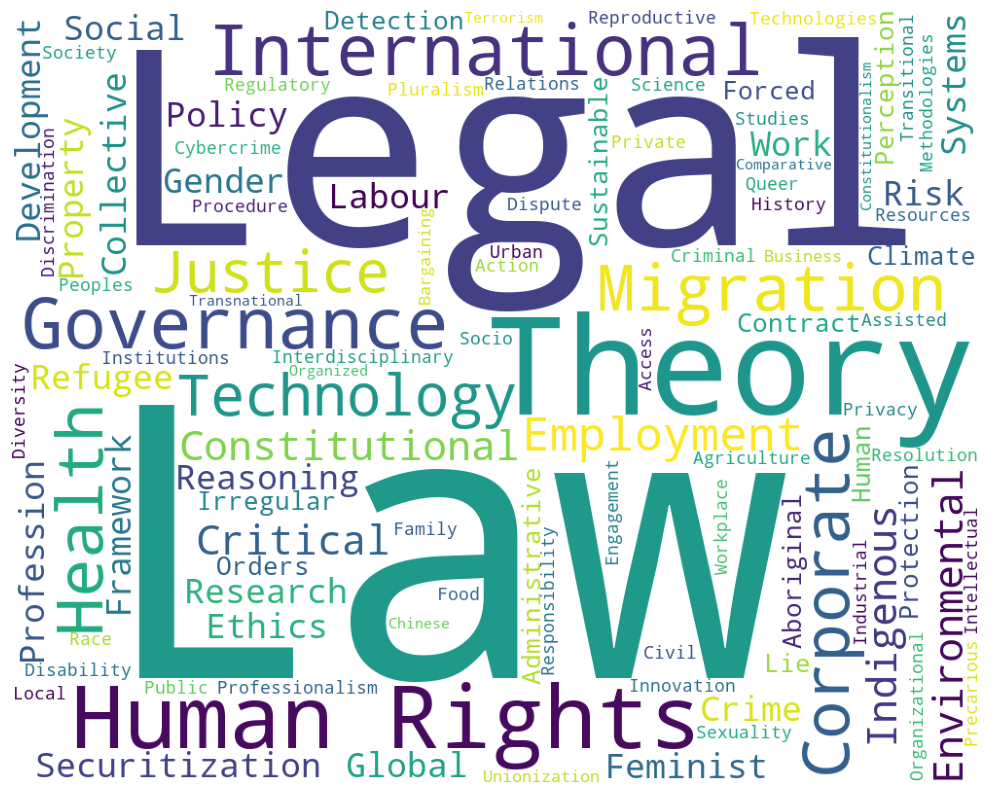

In [48]:
# Create word cloud of keywords

# create stopwords list
stopwords = [
    'Prize',
    'University',
    'Law School',
    'School of Law',
    'Osgoode',
    'Royal Society',
    'Research Council',
    'Centre'
]

# create list of keywords
keywords = []
for index, row in df.iterrows():
    phrases = row['keywords'].split(';')
    for phrase in phrases:
        phrase = phrase.replace('.', '')
        phrase = phrase.replace('/', ' and ')
        phrase = phrase.title()
        if not any(stopword in phrase for stopword in stopwords):
            keywords.append(phrase.strip())

text = '; '.join(keywords)

# Create a WordCloud object and generate the word cloud
colour_map = plt.cm.get_cmap('viridis', 100)
wordcloud = WordCloud(width = 1000, height = 800,
                background_color = 'white',
                min_font_size = 10,
                colormap=colour_map).generate(text)

# Display the word cloud
plt.figure(figsize = (100,10), facecolor = 'white')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 8 )
plt.show()
